In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

In [2]:
vgg16 = load_model('vgg.h5')

In [3]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 357, 328, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 357, 328, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 357, 328, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 178, 164, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 178, 164, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 178, 164, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 89, 82, 128)       0     

In [4]:
for layers in vgg16.layers:
    layers.trainable = False

In [5]:
model = Sequential()

model.add(vgg16)
model.add(Dense(256))
model.add(Flatten())

model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

model.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [6]:
data_folder = 'brain_tumor_final//'

train_dir = data_folder + "train//"
val_dir = data_folder + "val//"
test_dir = data_folder + "test//"

In [7]:
data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (357, 328),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'rgb',
                                            class_mode = 'binary')

val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (357, 328),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (357, 328),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

Found 2277 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [8]:
stop = EarlyStopping(patience = 10, monitor = 'val_loss')
history = model.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

Epoch 1/100
72/72 [==============================] - 103s 1s/step - loss: 1.3066 - accuracy: 0.5522 - val_loss: 0.4499 - val_accuracy: 0.7541
Epoch 2/100
72/72 [==============================] - 76s 1s/step - loss: 0.5074 - accuracy: 0.7569 - val_loss: 0.2850 - val_accuracy: 0.8955
Epoch 3/100
72/72 [==============================] - 81s 1s/step - loss: 0.4048 - accuracy: 0.8129 - val_loss: 0.2202 - val_accuracy: 0.9180
Epoch 4/100
72/72 [==============================] - 71s 974ms/step - loss: 0.3168 - accuracy: 0.8616 - val_loss: 0.1859 - val_accuracy: 0.9303
Epoch 5/100
72/72 [==============================] - 84s 1s/step - loss: 0.2755 - accuracy: 0.8841 - val_loss: 0.1669 - val_accuracy: 0.9303
Epoch 6/100
72/72 [==============================] - 72s 998ms/step - loss: 0.2726 - accuracy: 0.8843 - val_loss: 0.1540 - val_accuracy: 0.9488
Epoch 7/100
72/72 [==============================] - 64s 885ms/step - loss: 0.2329 - accuracy: 0.9025 - val_loss: 0.1176 - val_accuracy: 0.9488
Epo

In [9]:
vgg_hist = pd.DataFrame(history.history)
vgg_hist.to_csv('VGG.csv')

In [10]:
inception = load_model('inception.h5')
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 357, 328, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 178, 163, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 178, 163, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 178, 163, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [11]:
for layers in inception.layers:
    layers.trainable = False
    
inc = Sequential()

inc.add(inception)
inc.add(Dense(256))
inc.add(Flatten())

inc.add(Dense(128))
inc.add(LeakyReLU())
inc.add(Dropout(0.3))
inc.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

inc.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

inception_history =  inc.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

inception_hist = pd.DataFrame(inception_history.history)
inception_hist.to_csv('Inception.csv')

Epoch 1/100
72/72 [==============================] - 82s 1s/step - loss: 0.5700 - accuracy: 0.7187 - val_loss: 0.1947 - val_accuracy: 0.9160
Epoch 2/100
72/72 [==============================] - 63s 876ms/step - loss: 0.2258 - accuracy: 0.9082 - val_loss: 0.1414 - val_accuracy: 0.9467
Epoch 3/100
72/72 [==============================] - 65s 893ms/step - loss: 0.1591 - accuracy: 0.9365 - val_loss: 0.1176 - val_accuracy: 0.9529
Epoch 4/100
72/72 [==============================] - 63s 874ms/step - loss: 0.1465 - accuracy: 0.9463 - val_loss: 0.0998 - val_accuracy: 0.9488
Epoch 5/100
72/72 [==============================] - 69s 960ms/step - loss: 0.1129 - accuracy: 0.9570 - val_loss: 0.0866 - val_accuracy: 0.9693
Epoch 6/100
72/72 [==============================] - 70s 967ms/step - loss: 0.0920 - accuracy: 0.9662 - val_loss: 0.1005 - val_accuracy: 0.9611
Epoch 7/100
72/72 [==============================] - 72s 1s/step - loss: 0.1226 - accuracy: 0.9526 - val_loss: 0.1035 - val_accuracy: 0.969

In [12]:
resnet = load_model('resnet.h5')
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 357, 328, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 363, 334, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 179, 164, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 179, 164, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
for layers in resnet.layers:
    layers.trainable = False
    
res = Sequential()

res.add(resnet)
res.add(Dense(256))
res.add(Flatten())

res.add(Dense(128))
res.add(LeakyReLU())
res.add(Dropout(0.3))
res.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

res.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

resnet_history =  res.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

resnet_hist = pd.DataFrame(resnet_history.history)
resnet_hist.to_csv('Resnet.csv')

Epoch 1/100
72/72 [==============================] - 86s 1s/step - loss: 2.7847 - accuracy: 0.5505 - val_loss: 0.4991 - val_accuracy: 0.7541
Epoch 2/100
72/72 [==============================] - 74s 1s/step - loss: 0.6851 - accuracy: 0.6646 - val_loss: 1.1638 - val_accuracy: 0.5799
Epoch 3/100
72/72 [==============================] - 83s 1s/step - loss: 0.7443 - accuracy: 0.6739 - val_loss: 0.4513 - val_accuracy: 0.7951
Epoch 4/100
72/72 [==============================] - 77s 1s/step - loss: 0.6296 - accuracy: 0.6990 - val_loss: 0.4995 - val_accuracy: 0.7725
Epoch 5/100
72/72 [==============================] - 74s 1s/step - loss: 0.5920 - accuracy: 0.7106 - val_loss: 1.0014 - val_accuracy: 0.6148
Epoch 6/100
72/72 [==============================] - 72s 992ms/step - loss: 0.7289 - accuracy: 0.6675 - val_loss: 0.4179 - val_accuracy: 0.7951
Epoch 7/100
72/72 [==============================] - 70s 973ms/step - loss: 0.5602 - accuracy: 0.7285 - val_loss: 0.3998 - val_accuracy: 0.8156
Epoch 8

In [15]:
labels = test_gen.labels
vgg_preds = model.predict(test_gen)
vgg_preds = vgg_preds.round()

print(accuracy_score(labels, vgg_preds))

0.9836065573770492


In [17]:
inc_preds = model.predict(test_gen)
inc_preds = inc_preds.round()

print(accuracy_score(labels,inc_preds))

0.9836065573770492


In [18]:
res_preds = model.predict(test_gen).round()

print(accuracy_score(labels, res_preds))

0.9836065573770492


In [28]:
adam_model = pd.read_csv('Adam.csv', index_col = 'Unnamed: 0')
ada_grad_model = pd.read_csv('Adagrad.csv',  index_col = 'Unnamed: 0')
sgd_model = pd.read_csv('SGD.csv',  index_col = 'Unnamed: 0')
rms_prop_model = pd.read_csv('RMSProp.csv', index_col = 'Unnamed: 0')

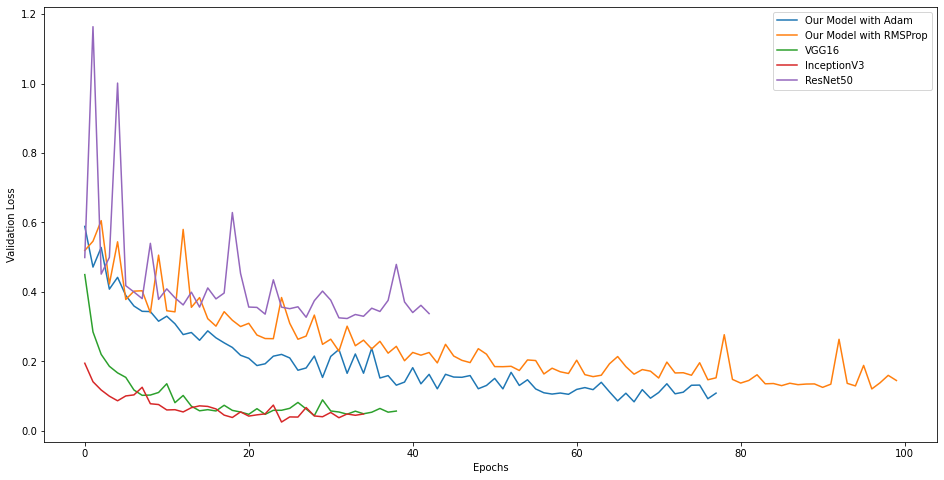

In [32]:
plt.figure(figsize = (16,8))

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")

plt.plot(adam_model['val_loss'], label = 'Our Model with Adam')
plt.plot(rms_prop_model['val_loss'], label = 'Our Model with RMSProp')
plt.plot(vgg_hist['val_loss'], label = 'VGG16')
plt.plot(inception_hist['val_loss'], label = 'InceptionV3')
plt.plot(resnet_hist['val_loss'], label = 'ResNet50')


plt.legend()

In [33]:
save_model(model, 'vgg16-finetuned')
save_model(inc, 'inception-finetuned')

INFO:tensorflow:Assets written to: vgg16-finetuned\assets
INFO:tensorflow:Assets written to: inception-finetuned\assets
